### Introduction About the Data :

**The goal is to find key factors which influence US Home Price.** 


There are 9 independent variables and 1 dependent variable :

* `MSACSR`: Monthly Supply of New Houses in the United States 
* `UNRATE`: Unemployment Rate 
* `MAVR`: Fixed Rate Mortgage Average in the United States 
* `DSPI`: Real Disposable Personal Income 
* `PMSAVE`: Personal Saving 
* `PCE`: Personal Consumption Expenditures 
* `OECD_GDP`: Leading Indicators OECD: Reference series: Gross Domestic Product (GDP): Normalized for the United States 
* `RGDP`: Real Gross Domestic Product 
* `DR`: Delinquency Rate on Single-Family Residential Mortgages, Booked in Domestic Offices, All Commercial Banks 
* `HPI`: House Price Index for the United States 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [106]:
df_MSACSR = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/MSACSR.csv")
df_UNRATE = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/UNRATE.csv")
df_MAVR = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/MORTGAGE30US.csv")
df_DSPI = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/DSPIC96.csv")
df_PMSAVE = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/PMSAVE.csv")
df_PCE = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/PCE.csv")
df_OECD_GDP = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/USALORSGPNOSTSAM.csv")
df_HPI = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/CSUSHPISA.csv")
df_DR = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/DRSFRMACBS.csv")
df_RGDP = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/GDPC1.csv")

## Merging into one dataset

In [107]:
merged_df = pd.merge(df_MSACSR, df_UNRATE, on='DATE', how='outer')
merged_df = pd.merge(merged_df, df_MAVR, on='DATE', how='outer')
merged_df = pd.merge(merged_df, df_DSPI, on='DATE', how='outer')
merged_df = pd.merge(merged_df, df_PMSAVE, on='DATE', how='outer')
merged_df = pd.merge(merged_df, df_PCE, on='DATE', how='outer')
merged_df = pd.merge(merged_df, df_OECD_GDP, on='DATE', how='outer')
merged_df = pd.merge(merged_df, df_RGDP, on='DATE', how='outer')
merged_df = pd.merge(merged_df, df_DR, on='DATE', how='outer')
df = pd.merge(merged_df, df_HPI, on='DATE', how='outer')

In [108]:
df

,DATE,MSACSR,UNRATE,MORTGAGE30US,DSPIC96,PMSAVE,PCE,USALORSGPNOSTSAM,GDPC1,DRSFRMACBS,CSUSHPISA
0,2002-01-01,4.2,5.7,6.9975,9951.9,451.1,7184.6,99.121440,13394.910,2.24,117.143
1,2002-02-01,4.0,5.7,6.8925,9966.6,437.5,7225.2,99.117811,NaN,NaN,117.845
2,2002-03-01,4.1,5.7,7.0140,9973.3,448.6,7243.4,99.111637,NaN,NaN,118.686
3,2002-04-01,4.3,5.9,6.9850,10007.2,440.7,7312.5,99.093106,13477.356,2.16,119.610
4,2002-05-01,4.0,5.8,6.8060,10047.9,504.4,7288.9,99.055417,NaN,NaN,120.724
...,...,...,...,...,...,...,...,...,...,...,...
255,2023-04-01,7.6,3.4,6.3425,15633.0,885.4,18241.4,100.047133,20386.467,1.72,300.214
256,2023-05-01,7.3,3.7,6.4250,15697.7,939.2,18274.3,100.062858,NaN,NaN,302.657
257,2023-06-01,7.5,3.6,6.7140,15701.3,852.1,18389.0,NaN,NaN,NaN,304.635
258,2023-07-01,7.3,3.5,6.8400,15673.5,705.6,18533.6,NaN,NaN,NaN,NaN


In [109]:
new_column_names = {'MORTGAGE30US': 'MAVR', 'DSPIC96': 'DSPI','USALORSGPNOSTSAM': 'OECD_GDP','GDPC1': 'RGDP','DRSFRMACBS': 'DR','CSUSHPISA': 'HPI'}
df.rename(columns=new_column_names, inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      260 non-null    object 
 1   MSACSR    259 non-null    float64
 2   UNRATE    260 non-null    float64
 3   MAVR      260 non-null    float64
 4   DSPI      259 non-null    float64
 5   PMSAVE    259 non-null    float64
 6   PCE       259 non-null    float64
 7   OECD_GDP  257 non-null    float64
 8   RGDP      86 non-null     float64
 9   DR        86 non-null     float64
 10  HPI       258 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.5+ KB


In [111]:
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')



In [112]:
df.columns

Index(['MSACSR', 'UNRATE', 'MAVR', 'DSPI', 'PMSAVE', 'PCE', 'OECD_GDP', 'RGDP',
       'DR', 'HPI'],
      dtype='object')

In [113]:
df.shape

(260, 10)

### Null values

In [114]:
df.isnull().sum()

MSACSR        1
UNRATE        0
MAVR          0
DSPI          1
PMSAVE        1
PCE           1
OECD_GDP      3
RGDP        174
DR          174
HPI           2
dtype: int64

##### As GDP and Delinquency Rate calculated quaterly 

In [115]:
df['RGDP'] = df['RGDP'].fillna(method='ffill', limit=2)
df['DR'] = df['DR'].fillna(method='ffill', limit=2)
df = df.dropna()

In [116]:
df

,MSACSR,UNRATE,MAVR,DSPI,PMSAVE,PCE,OECD_GDP,RGDP,DR,HPI
DATE,,,,,,,,,,
2002-01-01,4.2,5.7,6.9975,9951.9,451.1,7184.6,99.121440,13394.910,2.24,117.143
2002-02-01,4.0,5.7,6.8925,9966.6,437.5,7225.2,99.117811,13394.910,2.24,117.845
2002-03-01,4.1,5.7,7.0140,9973.3,448.6,7243.4,99.111637,13394.910,2.24,118.686
2002-04-01,4.3,5.9,6.9850,10007.2,440.7,7312.5,99.093106,13477.356,2.16,119.610
2002-05-01,4.0,5.8,6.8060,10047.9,504.4,7288.9,99.055417,13477.356,2.16,120.724
...,...,...,...,...,...,...,...,...,...,...
2023-01-01,8.1,3.4,6.2725,15504.7,785.3,18076.6,99.994540,20282.760,1.74,296.601
2023-02-01,8.4,3.6,6.2575,15545.3,836.1,18123.9,100.014996,20282.760,1.74,296.958
2023-03-01,8.1,3.5,6.5440,15598.6,901.2,18138.7,100.031746,20282.760,1.74,298.210


### Duplicate value

In [117]:
df.duplicated().sum()

0

In [118]:
df.columns

Index(['MSACSR', 'UNRATE', 'MAVR', 'DSPI', 'PMSAVE', 'PCE', 'OECD_GDP', 'RGDP',
       'DR', 'HPI'],
      dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2002-01-01 to 2023-05-01
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MSACSR    257 non-null    float64
 1   UNRATE    257 non-null    float64
 2   MAVR      257 non-null    float64
 3   DSPI      257 non-null    float64
 4   PMSAVE    257 non-null    float64
 5   PCE       257 non-null    float64
 6   OECD_GDP  257 non-null    float64
 7   RGDP      257 non-null    float64
 8   DR        257 non-null    float64
 9   HPI       257 non-null    float64
dtypes: float64(10)
memory usage: 22.1 KB


In [120]:
df.describe()

,MSACSR,UNRATE,MAVR,DSPI,PMSAVE,PCE,OECD_GDP,RGDP,DR,HPI
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,6.075875,5.952918,4.802630,12756.236965,922.259922,11566.172374,99.820672,16676.154525,4.686965,180.234720
std,1.953973,1.995953,1.166581,1821.539040,748.977162,2774.456836,1.241912,1895.725301,3.272922,44.974267
min,3.300000,3.400000,2.684000,9951.900000,193.400000,7184.600000,91.633777,13394.910000,1.410000,117.143000
25%,4.600000,4.500000,3.872500,11490.100000,453.300000,9685.800000,99.561327,15304.517000,2.000000,147.395000
50%,5.500000,5.500000,4.564000,12364.400000,785.300000,11105.300000,99.932470,16282.151000,3.100000,171.190000
75%,7.200000,7.200000,5.917500,14173.900000,1062.200000,13479.800000,100.444245,18310.300000,7.430000,198.294000
max,12.200000,14.700000,7.014000,19213.900000,6428.100000,18274.300000,101.861821,20386.467000,11.480000,304.817000


### Data Visualization

In [121]:
numerical_columns=df.columns[df.dtypes!='object']
print(numerical_columns)

Index(['MSACSR', 'UNRATE', 'MAVR', 'DSPI', 'PMSAVE', 'PCE', 'OECD_GDP', 'RGDP',
       'DR', 'HPI'],
      dtype='object')


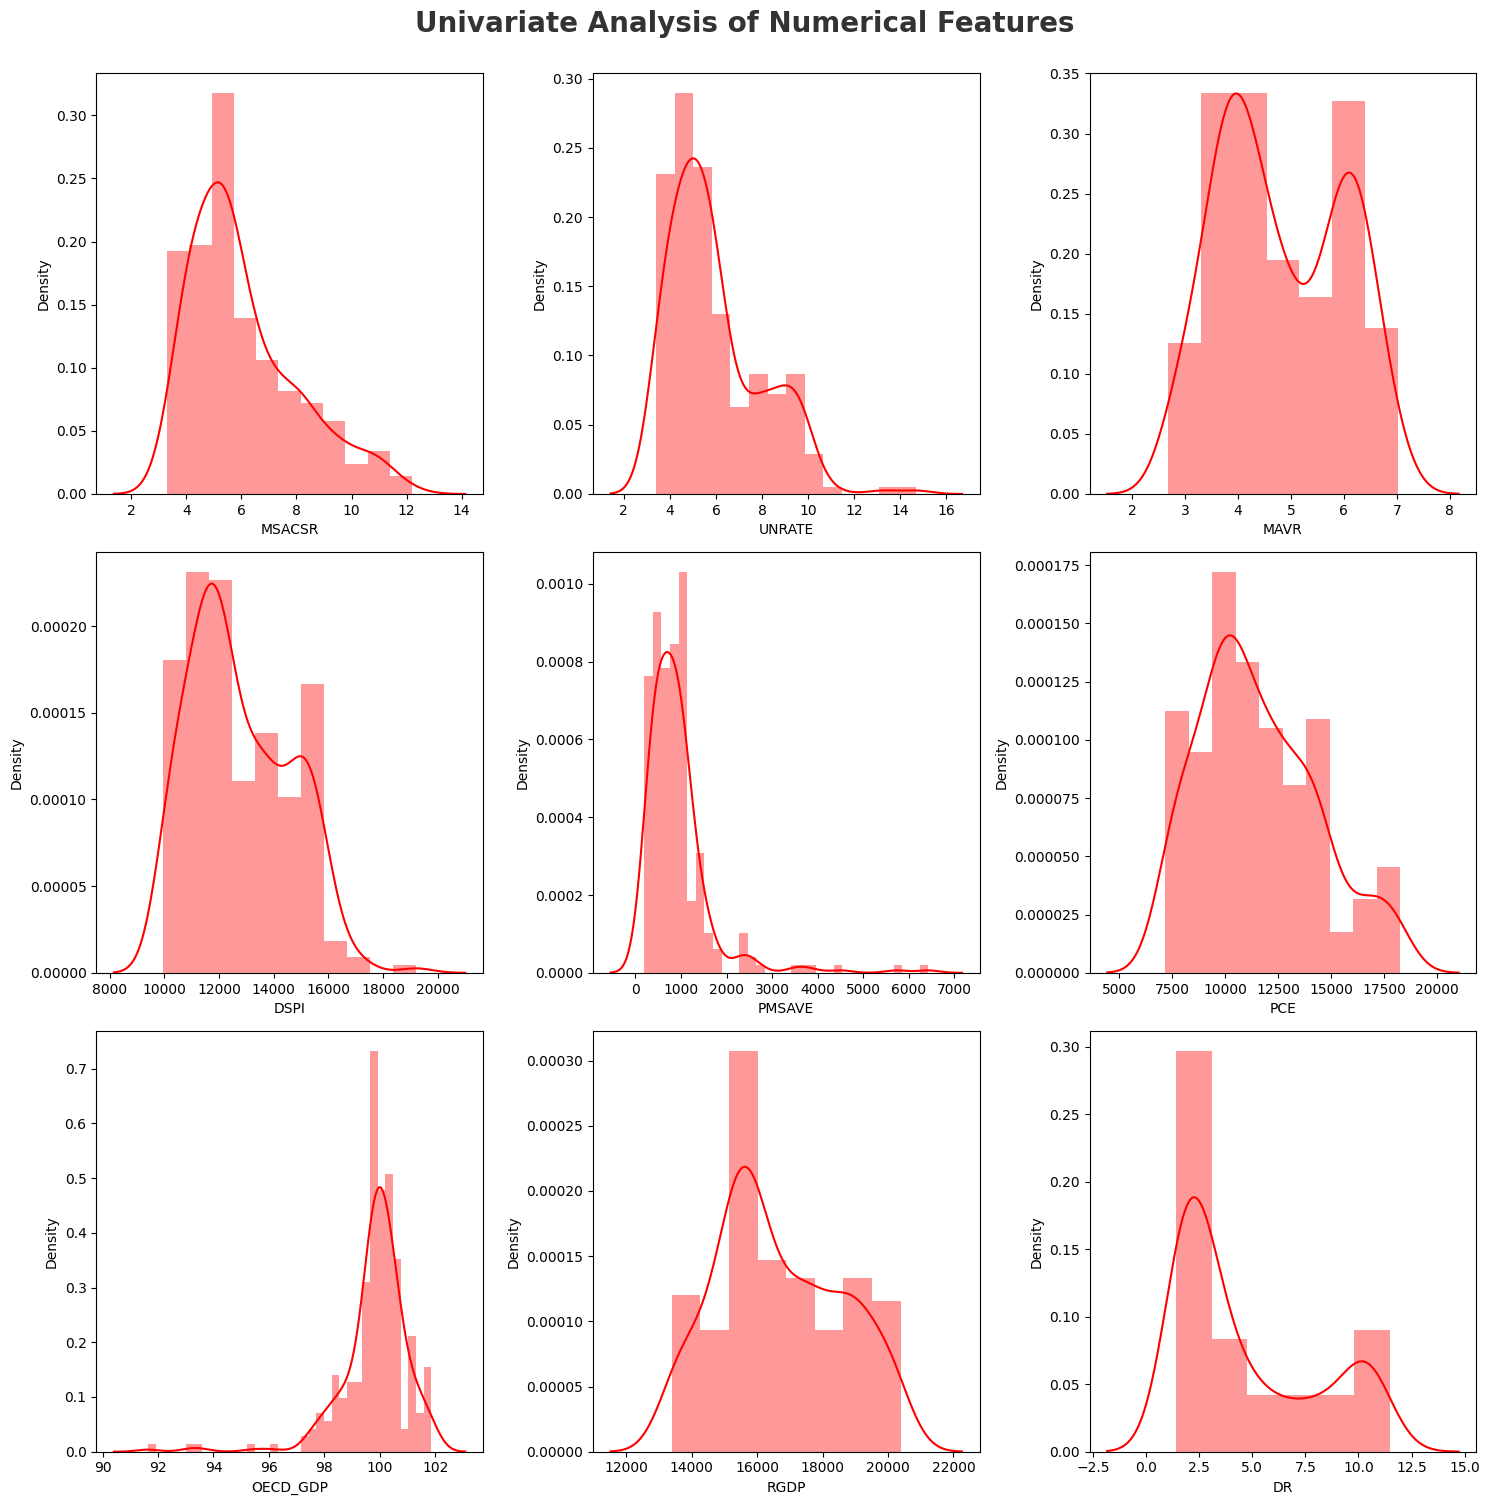

In [122]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    sns.distplot(x=df[numerical_columns[i]], color='r')
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

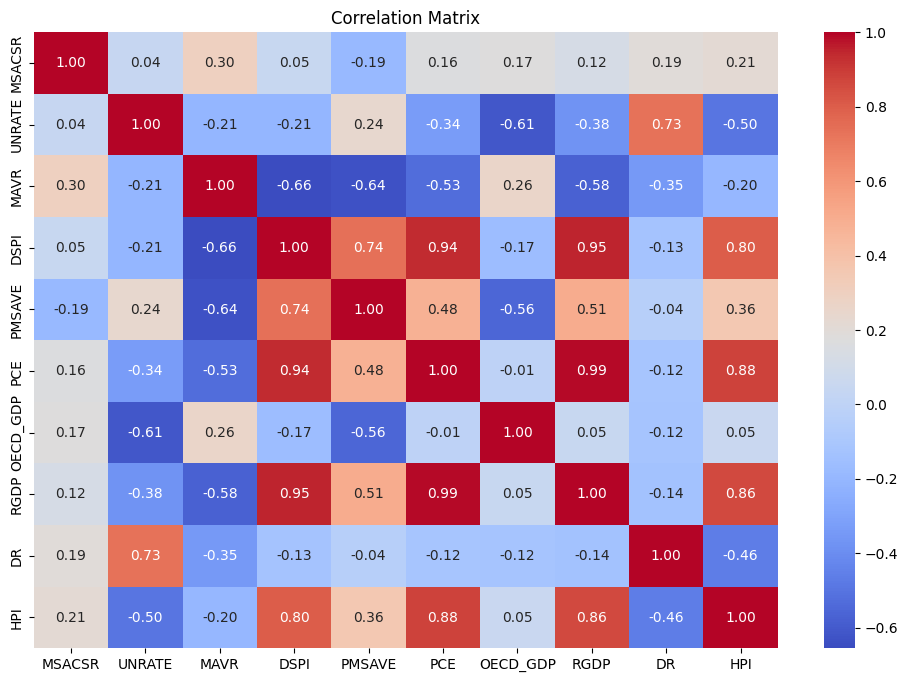

In [123]:
# Plot a correlation matrix to visualize relationships between variables
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()